In [203]:
import pandas as pd
import datetime 
from datetime import timedelta
import os
import numpy as np
import matplotlib.pyplot as plt

# Backup

# Code

In [ ]:
folder_path = "data/usaonlyanalysis"

# Raw Imports

In [1476]:
podcasts_raw = pd.read_csv(folder_path + '/' + 'TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv')
linkedIn_raw = pd.read_csv(folder_path + '/' + 'Impact_ Linkedin Ads Overview Report v2_NA - D_W_M_Table.csv')
paidgifting_raw = pd.read_csv(folder_path + '/' +  'paid_Gifting.csv')
fb_raw = pd.read_csv(folder_path + '/' + 'Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv')
events_raw = pd.read_csv(folder_path + '/' + 'EventsDataAgg - usonly.csv')
mqls_raw = pd.read_csv(folder_path + '/' + 'mql_lead_split.csv')
# mqls_raw = pd.read_csv(folder_path + '/' + 'mql_excl_and_linkedin_split.csv')
# mqls_raw = pd.read_csv(folder_path + '/' + 'mqls_updated_exc_and_linkedin_split.csv')
# mqls_raw = pd.read_csv(folder_path + '/' + 'mql_exclude_admin.csv')
emails_raw = pd.read_csv(folder_path + '/' + 'emailsWithFilterFlag.csv' )
google_search_raw = pd.read_csv(folder_path + '/' + 'GoogleSearchConsulExport-USOnly-DailyImpressions.csv')
google_ads_raw = pd.read_csv(folder_path + '/' +  'DEPT Initial Report - US ONLY.csv')
direct_raw = pd.read_csv(folder_path + '/' + 'DirectBuy.csv')
google_events_ga4_2024 = pd.read_csv(folder_path+'/'+'2024 Google Analytics Data.csv')
google_events_ga4_2025 = pd.read_csv(folder_path+'/'+'2025 Google Analytics Data.csv')
marketo_data_other = pd.read_csv(folder_path+'/'+'marketo_data_other.csv')


# GA4 Web Events Data

In [1340]:
google_events_ga4_2025['Date'].min()
google_events_ga4_2025['Date'].max()

'Set-Cookie:crlf=injection'

In [1341]:
google_web_events_ga4 = pd.concat([google_events_ga4_2025, google_events_ga4_2024], ignore_index=True)
google_web_events_ga4 = google_web_events_ga4[google_web_events_ga4['Date']!='Set-Cookie:crlf=injection']

In [1342]:
google_web_events_ga4['date'] = google_web_events_ga4['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
google_web_events_ga4['iso_week'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().week)
google_web_events_ga4['iso_year'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().year)
google_web_events_ga4['weekstr'] = google_web_events_ga4['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_web_events_ga4['yearstr'] = google_web_events_ga4['iso_year'].apply(lambda x: str(x))
google_web_events_ga4['model_week_str'] = google_web_events_ga4['yearstr'] + google_web_events_ga4['weekstr']
google_web_events_ga4['model_week'] =google_web_events_ga4['model_week_str'].apply(lambda x: int(x))
google_web_events_ga4 = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'Sessions', 'Page location']].rename({'Sessions':'ga4_sessions', 'Page location':'ga4_page_path'}, axis=1)


google_web_events_ga4['path_split'] = google_web_events_ga4['ga4_page_path'].str.split('/')
google_web_events_ga4['domain'] = google_web_events_ga4['path_split'].apply(lambda x: x[2])
google_web_events_ga4['domainsub1'] = google_web_events_ga4['path_split'].apply(lambda x: x[3] if len(x)>3 else '')

In [1343]:
inc_exc_page_list = pd.read_csv(folder_path+'/'+'ga4_inclusion_list.csv')

In [1344]:
inclusions = inc_exc_page_list[inc_exc_page_list['Include']==1]

In [1345]:
inclusions = inclusions['domainsub1'].tolist()
inclusions.append('affiliate-marketing')

In [1346]:
inclusions

['partners',
 'integrated-platform-prices',
 'contact',
 'influencer',
 'about',
 'partnership-management-platform',
 'influencer-marketing',
 'creator',
 'agency-partner-program',
 'privacy-policy',
 'referral-partner-program',
 'partnerships-experience',
 'partnerships',
 'lp',
 'insights',
 'affiliate',
 'advocate',
 'ebooks',
 'case-studies',
 'blog',
 'news',
 'technology-partners',
 'saas-partnership-marketing',
 'marketing-intelligence',
 'commerce-content',
 'customer-referral-marketing',
 'partnership-contract-pay',
 'business-development',
 'press-releases',
 'partnership-track',
 'videos',
 'customer-success-stories',
 'the-partnership-ecosystem-ig-pc-ed',
 'affiliate-marketing']

## Daily All Data

In [1347]:
google_web_events_ga4['refined_ga4_ressions'] = np.where(google_web_events_ga4['domainsub1'].isin(inclusions), google_web_events_ga4['ga4_sessions'], 0)

In [1348]:
google_daily_traffic = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions', 'refined_ga4_ressions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

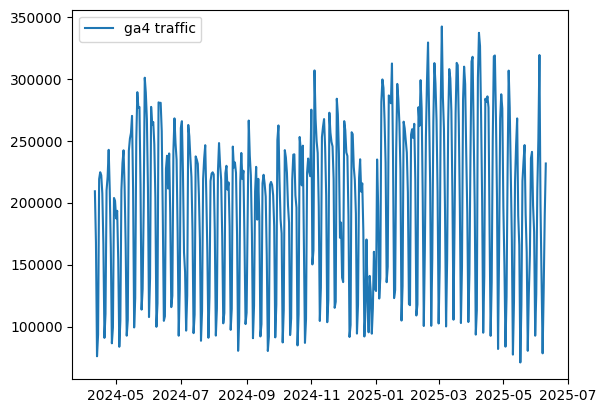

In [1349]:
x = google_daily_traffic['date'].to_numpy()
y2 = google_daily_traffic['ga4_sessions'].to_numpy()
plt.plot(x, y2, label='ga4 traffic')

plt.legend()
plt.show()

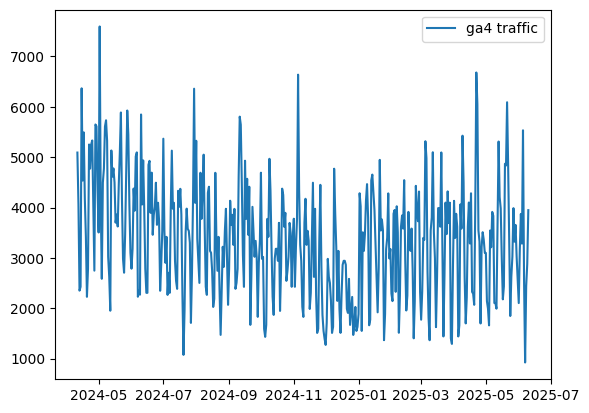

In [1350]:
x = google_daily_traffic['date'].to_numpy()
y2 = google_daily_traffic['refined_ga4_ressions'].to_numpy()
plt.plot(x, y2, label='ga4 traffic')

plt.legend()
plt.show()

In [1351]:
print(google_web_events_ga4.shape[0])
google_web_events_ga4 = google_web_events_ga4[google_web_events_ga4['domainsub1'].isin(inclusions)]
print(google_web_events_ga4.shape[0])
google_daily_traffic = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions', 'refined_ga4_ressions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

200000
5978


## Daily ImpactDotCom

In [1352]:
impactDotComPageInclusions =  pd.read_csv(folder_path+'/'+'ga4_domain_data_summary - mpact.com-domain-summary.csv')
impactDotComPageInclusions = impactDotComPageInclusions[impactDotComPageInclusions['Include']=='Yes']

In [1353]:
impactDotComPageInclusions.fillna('')
impactDotComPageInclusions

,Unnamed: 0,domainsub1,ga4_sessions,Include
0,0,NaN,3572169,Yes
1,1,partners,440737,Yes
2,2,affiliate-marketing,283069,Yes
3,3,request-a-demo-for-brands,165854,Yes
4,4,integrated-platform-prices,118149,Yes
...,...,...,...,...
70,70,find-influencers,279,Yes
72,72,onesheets,267,Yes
73,73,saasquatch,240,Yes
74,74,warc-research-report,230,Yes


In [1354]:
impactDotCom_daily_ga4 = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') &(google_web_events_ga4['domainsub1'].isin(impactDotComPageInclusions['domainsub1'])) ]

In [1355]:
impactDotCom_daily_ga4

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1,refined_ga4_ressions
2061,202517,2025-04-22,17,2025,1807.0,https://impact.com/case-studies/olipop-case-st...,"[https:, , impact.com, case-studies, olipop-ca...",impact.com,case-studies,1807.0
2685,202521,2025-05-22,21,2025,1402.0,https://impact.com/affiliate-marketing/,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing,1402.0
3058,202516,2025-04-15,16,2025,1254.0,https://impact.com/affiliate-marketing/,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing,1254.0
3085,202521,2025-05-20,21,2025,1254.0,https://impact.com/partners/affiliate-partners/,"[https:, , impact.com, partners, affiliate-par...",impact.com,partners,1254.0
3198,202523,2025-06-05,23,2025,1217.0,https://impact.com/case-studies/olipop-case-st...,"[https:, , impact.com, case-studies, olipop-ca...",impact.com,case-studies,1217.0
...,...,...,...,...,...,...,...,...,...,...
199722,202424,2024-06-12,24,2024,80.0,https://impact.com/news/why-are-referral-partn...,"[https:, , impact.com, news, why-are-referral-...",impact.com,news,80.0
199723,202424,2024-06-12,24,2024,80.0,https://impact.com/partnerships/5-dos-and-dont...,"[https:, , impact.com, partnerships, 5-dos-and...",impact.com,partnerships,80.0
199724,202424,2024-06-12,24,2024,80.0,https://impact.com/press-releases/,"[https:, , impact.com, press-releases, ]",impact.com,press-releases,80.0
199725,202424,2024-06-12,24,2024,80.0,https://impact.com/press-releases/impact-com-r...,"[https:, , impact.com, press-releases, impact-...",impact.com,press-releases,80.0


In [1356]:
impactDotCom_daily_traffic = impactDotCom_daily_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'impactDotCom_ga4_sessions'}, axis=1)

In [1357]:
impactDotCom_daily_traffic

,model_week,date,iso_week,iso_year,impactDotCom_ga4_sessions
0,202415,2024-04-11,15,2024,4813.0
1,202415,2024-04-12,15,2024,4061.0
2,202415,2024-04-13,15,2024,2350.0
3,202415,2024-04-14,15,2024,2307.0
4,202416,2024-04-15,16,2024,5930.0
...,...,...,...,...,...
421,202523,2025-06-06,23,2025,2399.0
422,202523,2025-06-07,23,2025,923.0
423,202523,2025-06-08,23,2025,2290.0
424,202524,2025-06-09,24,2025,2879.0


## Path Analysis

In [1358]:
page_path_summary = google_web_events_ga4[['ga4_page_path', 'ga4_sessions']].groupby('ga4_page_path').sum().sort_values(by='ga4_sessions', ascending=False).reset_index()
page_path_summary[page_path_summary['ga4_sessions']>800000]

,ga4_page_path,ga4_sessions


In [1359]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')

In [1360]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')
page_path_summary['domain'] = page_path_summary['path_split'].apply(lambda x: x[2])
page_path_summary['domainsub1'] = page_path_summary['path_split'].apply(lambda x: x[3] if len(x)>3 else '')
page_path_summary['domainsub2'] = page_path_summary['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
page_path_summary['domainsub3'] = page_path_summary['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
page_path_summary['domainsub4'] = page_path_summary['path_split'].apply(lambda x: x[6]if len(x)>6 else '')

In [1361]:
page_path_summary

,ga4_page_path,ga4_sessions,path_split,domain,domainsub1,domainsub2,domainsub3,domainsub4
0,https://impact.com/affiliate-marketing/,282847.0,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing,,,
1,https://impact.com/partners/affiliate-partners/,271983.0,"[https:, , impact.com, partners, affiliate-par...",impact.com,partners,affiliate-partners,,
2,https://impact.com/partners/,116388.0,"[https:, , impact.com, partners, ]",impact.com,partners,,,
3,https://impact.com/integrated-platform-prices/,111207.0,"[https:, , impact.com, integrated-platform-pri...",impact.com,integrated-platform-prices,,,
4,https://impact.com/about/,61624.0,"[https:, , impact.com, about, ]",impact.com,about,,,
...,...,...,...,...,...,...,...,...
538,https://impact.com/commerce-content/how-brands...,74.0,"[https:, , impact.com, commerce-content, how-b...",impact.com,commerce-content,how-brands-can-find-successful-publisher-partners,,
539,https://impact.com/commerce-content/how-brande...,74.0,"[https:, , impact.com, commerce-content, how-b...",impact.com,commerce-content,how-branded-content-is-redefining-advertising-...,?utm_source=chatgpt.com,
540,https://impact.com/influencer/how-much-do-infl...,74.0,"[https:, , impact.com, influencer, how-much-do...",impact.com,influencer,how-much-do-influencers-charge-per-post,?utm_source=chatgpt.com,
541,https://impact.com/partners/affiliate-partners...,74.0,"[https:, , impact.com, partners, affiliate-par...",impact.com,partners,affiliate-partners,?irclickid=yzYyruXkoxyKRiQ2XTQp1VqJUks2MgyHISM...,


In [1362]:
domain_summary = page_path_summary[['domain', 'ga4_sessions']].groupby('domain').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1363]:
domain_summary.to_csv('ga4_domain_data_summary.csv')

In [1364]:
page_path_summary['domain']

0      impact.com
1      impact.com
2      impact.com
3      impact.com
4      impact.com
          ...    
538    impact.com
539    impact.com
540    impact.com
541    impact.com
542    impact.com
Name: domain, Length: 543, dtype: object

In [1365]:
impactDotComPages = page_path_summary[page_path_summary['domain']=='impact.com']

In [1366]:
impactDotComPages[['domainsub1', 'ga4_sessions', 'path_split']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

,domainsub1,ga4_sessions,path_split
0,partners,440737.0,"[https:, , impact.com, partners, affiliate-par..."
1,affiliate-marketing,283069.0,"[https:, , impact.com, affiliate-marketing, , ..."
2,integrated-platform-prices,118149.0,"[https:, , impact.com, integrated-platform-pri..."
3,contact,80094.0,"[https:, , impact.com, contact, , https:, , im..."
4,influencer,63803.0,"[https:, , impact.com, influencer, how-much-do..."
5,about,61852.0,"[https:, , impact.com, about, , https:, , impa..."
6,partnership-management-platform,49136.0,"[https:, , impact.com, partnership-management-..."
7,influencer-marketing,38249.0,"[https:, , impact.com, influencer-marketing, ,..."
8,creator,35706.0,"[https:, , impact.com, creator, , https:, , im..."
9,agency-partner-program,26209.0,"[https:, , impact.com, agency-partner-program,..."


In [1367]:
impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

,domainsub1,ga4_sessions
0,partners,440737.0
1,affiliate-marketing,283069.0
2,integrated-platform-prices,118149.0
3,contact,80094.0
4,influencer,63803.0
5,about,61852.0
6,partnership-management-platform,49136.0
7,influencer-marketing,38249.0
8,creator,35706.0
9,agency-partner-program,26209.0


In [1368]:
impactDotComPagesSummary = impactDotComPages[['ga4_page_path',  'ga4_sessions','domainsub1','domainsub2']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1369]:
impactDotComPagesSummary

,domainsub1,ga4_page_path,ga4_sessions,domainsub2
0,partners,https://impact.com/partners/affiliate-partners...,440737.0,affiliate-partnersinfluencer-partnerspublisher...
1,affiliate-marketing,https://impact.com/affiliate-marketing/https:/...,283069.0,?_gl=xxxxxxxxxxxxxxxxxx&gclid=CjwKCAiAwaG9BhAR...
2,integrated-platform-prices,https://impact.com/integrated-platform-prices/...,118149.0,?utm_source=pxa.impact.com&utm_medium=owned-pl...
3,contact,https://impact.com/contact/https://impact.com/...,80094.0,support?_gl=xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...
4,influencer,https://impact.com/influencer/how-much-do-infl...,63803.0,how-much-do-influencers-charge-per-postinfluen...
5,about,https://impact.com/about/https://impact.com/ab...,61852.0,sustainability
6,partnership-management-platform,https://impact.com/partnership-management-plat...,49136.0,pc-aw-ig-managing-partnerships-throughout-thei...
7,influencer-marketing,https://impact.com/influencer-marketing/https:...,38249.0,managed-services?_gl=xxxxxxxxxxxxxxxxxx&gclid=...
8,creator,https://impact.com/creator/https://impact.com/...,35706.0,?utm_source=google&utm_medium=cpc&utm_campaign...
9,agency-partner-program,https://impact.com/agency-partner-program/http...,26209.0,directory?_gl=xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...


In [1370]:
impactDotComPagesSummary.to_csv('impactDotComPagesSummary.csv')

# Google Ads

In [1371]:
google_ads = google_ads_raw.copy()
google_ads = google_ads[google_ads['Account name']=='Impact Radius']
google_ads['date'] = google_ads['Day'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_ads['iso_week'] = google_ads['date'].apply(lambda x: x.isocalendar().week)
google_ads['iso_year'] = google_ads['date'].apply(lambda x: x.isocalendar().year)
google_ads['weekstr'] = google_ads['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_ads['yearstr'] = google_ads['iso_year'].apply(lambda x: str(x))
google_ads['model_week_str'] = google_ads['yearstr'] + google_ads['weekstr']
google_ads['model_week'] =google_ads['model_week_str'].apply(lambda x: int(x))
google_ads = google_ads[['model_week', 'date', 'iso_week', 'iso_year', 'Cost', 'Impr.']].rename({'Cost':'googleAds_spend', 'Impr.':'googleAds_impressions'}, axis=1)

# Podcast

In [1372]:
podcasts = podcasts_raw.copy()
podcasts['date'] = podcasts['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
podcasts['iso_week'] = podcasts['date'].apply(lambda x: x.isocalendar().week)
podcasts['iso_year'] = podcasts['date'].apply(lambda x: x.isocalendar().year)
podcasts['weekstr'] = podcasts['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
podcasts['yearstr'] = podcasts['iso_year'].apply(lambda x: str(x))
podcasts['model_week_str'] = podcasts['yearstr'] + podcasts['weekstr']
podcasts['model_week'] =podcasts['model_week_str'].apply(lambda x: int(x))
podcasts = podcasts[['model_week', 'date', 'iso_week', 'iso_year', 'Downloads']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Downloads':'podcast_streams'}, axis=1).reset_index()

In [1373]:
podcasts['date']

0       2022-06-03
1       2022-06-04
2       2022-06-05
3       2022-06-06
4       2022-06-07
           ...    
1094    2025-06-01
1095    2025-06-02
1096    2025-06-03
1097    2025-06-04
1098    2025-06-05
Name: date, Length: 1099, dtype: object

# LinkedIn

In [1374]:
linkedIn = linkedIn_raw.copy()


In [1375]:
linkedIn = linkedIn_raw.copy()
linkedIn['date'] = linkedIn['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
linkedIn['iso_week'] = linkedIn['date'].apply(lambda x: x.isocalendar().week)
linkedIn['iso_year'] = linkedIn['date'].apply(lambda x: x.isocalendar().year)
linkedIn['weekstr'] = linkedIn['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
linkedIn['yearstr'] = linkedIn['iso_year'].apply(lambda x: str(x))
linkedIn['model_week_str'] = linkedIn['yearstr'] + linkedIn['weekstr']
linkedIn['model_week'] =linkedIn['model_week_str'].apply(lambda x: int(x))
linkedIn = linkedIn[['model_week', 'date', 'iso_week', 'iso_year', 'Total spent', 'Impressions','Clicks' ]].rename({'Total spent':'linkedin_spend','Impressions':'linkedin_impressions', 'Clicks':'linkedin_clicks' }, axis=1)

# FB

In [1376]:
fb_raw

,Date,Amount spent,Impressions,Link clicks,CTR (link click-through rate),CPM,CPC (link),On-Facebook leads,Cost per on-Facebook lead,Website conversions,Frequency
0,"Jun 11, 2025",712.51,38520,171,0.004439,18.497144,4.166725,11,64.773636,53,NaN
1,"Jun 10, 2025",2294.01,143786,680,0.004729,15.954335,3.373544,58,39.551897,237,NaN
2,"Jun 9, 2025",2274.63,143534,719,0.005009,15.847325,3.163602,49,46.421020,272,NaN
3,"Jun 8, 2025",2374.80,147653,759,0.005140,16.083656,3.128854,52,45.669231,243,NaN
4,"Jun 7, 2025",2265.68,142247,766,0.005385,15.927788,2.957807,51,44.425098,258,NaN
...,...,...,...,...,...,...,...,...,...,...,...
855,"Jan 7, 2023",1041.89,54117,295,0.005451,19.252545,3.531831,20,52.094500,31,NaN
856,"Jan 6, 2023",1052.34,58945,307,0.005208,17.852914,3.427818,14,75.167143,37,NaN
857,"Jan 5, 2023",1047.54,55214,303,0.005488,18.972362,3.457228,12,87.295000,43,NaN
858,"Jan 4, 2023",1048.24,49117,283,0.005762,21.341694,3.704028,20,52.412000,32,NaN


In [1377]:
fb = fb_raw.copy()
fb['date'] = fb['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
fb['iso_week'] = fb['date'].apply(lambda x: x.isocalendar().week)
fb['iso_year'] = fb['date'].apply(lambda x: x.isocalendar().year)
fb['weekstr'] = fb['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
fb['yearstr'] = fb['iso_year'].apply(lambda x: str(x))
fb['model_week_str'] = fb['yearstr'] + fb['weekstr']
fb['model_week'] =fb['model_week_str'].apply(lambda x: int(x))
fb = fb[['model_week', 'date', 'iso_week', 'iso_year', 'Amount spent', 'Impressions','Link clicks' ]].rename({'Amount spent':'fb_spend','Impressions':'fb_impressions', 'Link clicks':'fb_clicks' }, axis=1)


In [1378]:
fb

,model_week,date,iso_week,iso_year,fb_spend,fb_impressions,fb_clicks
0,202524,2025-06-11,24,2025,712.51,38520,171
1,202524,2025-06-10,24,2025,2294.01,143786,680
2,202524,2025-06-09,24,2025,2274.63,143534,719
3,202523,2025-06-08,23,2025,2374.80,147653,759
4,202523,2025-06-07,23,2025,2265.68,142247,766
...,...,...,...,...,...,...,...
855,202301,2023-01-07,1,2023,1041.89,54117,295
856,202301,2023-01-06,1,2023,1052.34,58945,307
857,202301,2023-01-05,1,2023,1047.54,55214,303
858,202301,2023-01-04,1,2023,1048.24,49117,283


# Google Search

In [1379]:
google_search = google_search_raw.copy() 

In [1380]:
google_search

,Date,Clicks,Impressions,CTR,Position
0,2025-06-04,1302,95609,1.36%,23.85
1,2025-06-03,1439,89275,1.61%,23.24
2,2025-06-02,1332,96166,1.39%,25.65
3,2025-06-01,469,70008,0.67%,29.57
4,2025-05-31,437,68313,0.64%,30.08
...,...,...,...,...,...
481,2024-02-09,1177,30566,3.85%,22.44
482,2024-02-08,1272,33018,3.85%,19.90
483,2024-02-07,1444,34593,4.17%,20.09
484,2024-02-06,1559,37451,4.16%,20.79


In [1381]:
google_search['date'] = google_search['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_search['iso_week'] = google_search['date'].apply(lambda x: x.isocalendar().week)
google_search['iso_year'] = google_search['date'].apply(lambda x: x.isocalendar().year)
google_search['weekstr'] = google_search['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_search['yearstr'] = google_search['iso_year'].apply(lambda x: str(x))
google_search['model_week_str'] = google_search['yearstr'] + google_search['weekstr']
google_search['model_week'] =google_search['model_week_str'].apply(lambda x: int(x))
google_search = google_search[['model_week', 'date', 'iso_week', 'iso_year', 'Clicks', 'Impressions']].rename({'Clicks':'gSearch_sessions', 'Impressions':'gSearch_impressions'}, axis=1)

In [1382]:
google_search

,model_week,date,iso_week,iso_year,gSearch_sessions,gSearch_impressions
0,202523,2025-06-04,23,2025,1302,95609
1,202523,2025-06-03,23,2025,1439,89275
2,202523,2025-06-02,23,2025,1332,96166
3,202522,2025-06-01,22,2025,469,70008
4,202522,2025-05-31,22,2025,437,68313
...,...,...,...,...,...,...
481,202406,2024-02-09,6,2024,1177,30566
482,202406,2024-02-08,6,2024,1272,33018
483,202406,2024-02-07,6,2024,1444,34593
484,202406,2024-02-06,6,2024,1559,37451


# Paid Gifting

In [1383]:
paidgifting = paidgifting_raw.dropna().copy()
paidgifting['date']= paidgifting['gift_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
paidgifting['iso_week'] = paidgifting['date'].apply(lambda x: x.isocalendar().week)
paidgifting['iso_year'] = paidgifting['date'].apply(lambda x: x.isocalendar().year)
paidgifting['weekstr'] = paidgifting['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
paidgifting['yearstr'] = paidgifting['iso_year'].apply(lambda x: str(x))
paidgifting['model_week_str'] = paidgifting['yearstr'] + paidgifting['weekstr']
paidgifting['model_week'] =paidgifting['model_week_str'].apply(lambda x: int(x))
paidgifting = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_cost']].rename({'gift_cost':'gift_spend'}, axis=1)
paidgifting_daily = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_spend']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

# MQLs

In [1384]:
mqls_raw

,lead_mql_date,cnt_all,cnt_Linkendin,cnt_qualified,cnt_bdr,cnt_sales_sourced,cnt_pharios,cnt_DC360
0,2025-04-22,605,21,11,7,19,1,5
1,2024-07-12,75,38,0,0,0,0,0
2,2024-09-20,49,20,0,0,0,0,0
3,2024-05-27,61,38,0,0,0,0,0
4,2025-02-05,89,29,8,0,0,0,0
...,...,...,...,...,...,...,...,...
454,2025-01-18,28,21,0,0,0,0,0
455,2024-12-21,24,13,0,0,0,0,0
456,2025-05-11,10,5,0,0,0,0,0
457,2025-05-04,11,6,0,0,0,0,0


In [1385]:
mqls_raw[mqls_raw['cnt_qualified']>4]
mqls_raw[mqls_raw['cnt_bdr']>4]
mqls_raw[mqls_raw['cnt_sales_sourced']>0]
mqls_raw[mqls_raw['cnt_pharios']>0]
mqls_raw[mqls_raw['cnt_DC360']>0]

,lead_mql_date,cnt_all,cnt_Linkendin,cnt_qualified,cnt_bdr,cnt_sales_sourced,cnt_pharios,cnt_DC360
0,2025-04-22,605,21,11,7,19,1,5
18,2024-04-18,107,67,0,0,1,0,1
50,2024-11-21,152,85,1,0,0,0,10
62,2024-07-11,48,12,0,0,0,0,2
75,2024-08-13,62,25,0,0,0,0,2
80,2024-08-19,122,17,6,0,0,0,22
86,2024-09-03,80,43,0,0,0,0,1
114,2024-11-06,148,100,0,0,2,0,2
136,2024-12-16,86,19,3,0,0,0,22
150,2025-01-24,81,34,0,0,0,0,1


In [1386]:
mqls_raw[mqls_raw['cnt_all']>100]

,lead_mql_date,cnt_all,cnt_Linkendin,cnt_qualified,cnt_bdr,cnt_sales_sourced,cnt_pharios,cnt_DC360
0,2025-04-22,605,21,11,7,19,1,5
10,2024-04-05,143,121,0,0,0,0,0
16,2024-04-15,116,59,0,0,0,0,0
18,2024-04-18,107,67,0,0,1,0,1
28,2024-05-07,162,107,0,0,0,0,0
50,2024-11-21,152,85,1,0,0,0,10
57,2024-06-25,108,59,0,0,0,0,0
61,2024-07-09,184,116,0,0,0,0,0
74,2024-08-12,102,57,0,0,0,0,0
80,2024-08-19,122,17,6,0,0,0,22


In [1387]:
mqls_raw[['cnt_Linkendin']]

,cnt_Linkendin
0,21
1,38
2,20
3,38
4,29
...,...
454,21
455,13
456,5
457,6


In [1388]:
mqls = mqls_raw.copy()
mqls['date']= mqls['lead_mql_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
mqls['iso_week'] = mqls['date'].apply(lambda x: x.isocalendar().week)
mqls['iso_year'] = mqls['date'].apply(lambda x: x.isocalendar().year)
mqls['weekstr'] = mqls['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
mqls['yearstr'] = mqls['iso_year'].apply(lambda x: str(x))
mqls['model_week_str'] = mqls['yearstr'] + mqls['weekstr']
mqls['model_week'] = mqls['model_week_str'].apply(lambda x: int(x))
mqls['cnt_all'] = mqls['cnt_all'].fillna(0)
mqls['cnt_Linkendin'] = mqls['cnt_Linkendin'].fillna(0)
mqls= mqls[['model_week', 'iso_week', 'iso_year', 'date', 'cnt_all', 'cnt_Linkendin', 'cnt_sales_sourced', 'cnt_pharios', 'cnt_DC360', 'cnt_DC360']].rename({'cnt_all':'all_mql_count', 'cnt_Linkendin':'linkedin_mql_count', 'cnt_sales_sourced':'sales_sourced_mql_cnt', 'cnt_pharios':'pharios_mql_cnt', 'cnt_DC360':'dc360_mql_count'}, axis=1)


In [1389]:
mqls

,model_week,iso_week,iso_year,date,all_mql_count,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count
0,202517,17,2025,2025-04-22,605,21,19,1,5,5
1,202428,28,2024,2024-07-12,75,38,0,0,0,0
2,202438,38,2024,2024-09-20,49,20,0,0,0,0
3,202422,22,2024,2024-05-27,61,38,0,0,0,0
4,202506,6,2025,2025-02-05,89,29,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
454,202503,3,2025,2025-01-18,28,21,0,0,0,0
455,202451,51,2024,2024-12-21,24,13,0,0,0,0
456,202519,19,2025,2025-05-11,10,5,0,0,0,0
457,202518,18,2025,2025-05-04,11,6,0,0,0,0


# Emails

In [1390]:
emails_raw

,Email Name,Sent,Delivered,% Delivered,Hard Bounced,Soft Bounced,Pending,Opened,% Opened,Clicked Email,% Clicked Email,Clicked to Opened Ratio,Unsubscribed,% Unsubscribed,First Activity (PDT),Last Activity (PDT),Include,days_between
0,6Sense-Email-Send | 20240703.6Sense-7-3-Email,"8,262","7,772",94.10%,131,359,0,"1,121",14.40%,110,1.40%,9.80%,20,0.30%,"Jul 3, 2024 10:00 AM","Apr 14, 2025 5:28 PM",0,285
1,6Sense-Email-Send | 20240716 - Resend.6Sense-7...,"6,128","5,779",94.30%,41,308,0,281,4.90%,23,0.40%,8.20%,6,0.10%,"Jul 16, 2024 10:00 AM","Mar 12, 2025 11:16 PM",0,240
2,Blog and Newsletter Subscriber.[New] Thank you...,893,671,75.10%,73,149,0,419,62.40%,106,15.80%,25.30%,7,1.00%,"Nov 6, 2023 3:17 PM","Jun 6, 2025 12:08 PM",0,578
3,Blog and Newsletter Subscriber.Thank you for s...,458,396,86.50%,16,46,0,231,58.30%,61,15.40%,26.40%,0,0.00%,"Jun 6, 2023 5:31 AM","Jun 2, 2025 3:22 PM",0,727
4,CD | 2024 Southeast Asia eCommerce Influencer ...,110,97,88.20%,8,5,0,44,45.40%,13,13.40%,29.50%,0,0.00%,"Oct 16, 2024 10:06 AM","May 27, 2025 6:13 PM",0,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Paid-Social Nurture | Affiliate.Email 4,63,59,93.70%,1,3,0,30,50.80%,2,3.40%,6.70%,0,0.00%,"Jun 7, 2023 11:01 AM","Nov 21, 2023 8:27 AM",0,167
878,Paid-Social Nurture | Ultimate guide to influe...,13,9,69.20%,2,2,0,2,22.20%,0,0.00%,NaN,0,0.00%,"Nov 2, 2023 11:00 AM","Nov 4, 2023 1:18 PM",0,2
879,Paid-Social Nurture | Ultimate guide to influe...,16,13,81.30%,1,2,0,2,15.40%,0,0.00%,NaN,0,0.00%,"Nov 2, 2023 11:00 AM","Nov 8, 2023 11:00 PM",0,7
880,Paid-Social Nurture | Ultimate guide to influe...,21,16,76.20%,3,2,0,5,31.30%,0,0.00%,NaN,0,0.00%,"Jul 16, 2023 11:00 AM","Nov 14, 2023 8:27 PM",0,121


In [1391]:
emails = emails_raw[emails_raw['Include']==1].copy()
emails['date'] = emails['First Activity (PDT)'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y %I:%M %p").date())
emails['iso_week'] = emails['date'].apply(lambda x: x.isocalendar().week)
emails['iso_year'] = emails['date'].apply(lambda x: x.isocalendar().year)
emails['weekstr'] = emails['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
emails['yearstr'] = emails['iso_year'].apply(lambda x: str(x))
emails['model_week_str'] = emails['yearstr'] + emails['weekstr']
emails['model_week'] =emails['model_week_str'].apply(lambda x: int(x))
emails = emails[['model_week', 'date', 'iso_week', 'iso_year', 'Sent', 'Delivered','Opened' ]].rename({'Sent':'email_sent_cnt','Delivered':'email_delivered_cnt', 'Opened':'email_opened_cnt' }, axis=1)
for var in ['email_sent_cnt', 'email_delivered_cnt','email_opened_cnt']:
    print(var)
    emails[var]=emails[var].apply(lambda x: int(x.replace(",", "")))
emails_daily = emails[['model_week', 'date', 'iso_week', 'iso_year', 'email_opened_cnt']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()


email_sent_cnt
email_delivered_cnt
email_opened_cnt


In [1392]:
emails_daily

,model_week,date,iso_week,iso_year,email_opened_cnt
0,202323,2023-06-06,23,2023,883
1,202323,2023-06-07,23,2023,354
2,202323,2023-06-08,23,2023,45
3,202324,2023-06-12,24,2023,223
4,202324,2023-06-13,24,2023,8479
...,...,...,...,...,...
165,202520,2025-05-15,20,2025,9379
166,202521,2025-05-20,21,2025,302
167,202522,2025-05-27,22,2025,376
168,202523,2025-06-02,23,2025,997


# Direct

In [1393]:
direct_raw[ 'Vendor '].unique()

array(['Morning Brew', 'PharosIQ', 'Industry dive', 'Workweek',
       'Smartbrief', nan, 'Industry Dive', 'DC360', 'Marketing examined',
       'Stacked Marketer', 'Growth Hacks', 'Why We Buy', 'Demand Curve',
       'inside.com', 'Crossed Commerce', 'Marketing Examined',
       'Growth Hackers Daily', 'Growth Hackers Weekly',
       'Growth Hacks Weekly', 'MArketing Examined', 'Why we buy',
       'Inside.com', 'Digital Commerce 360', 'Adweek', 'Stacked marketer'],
      dtype=object)

In [1394]:
dc_exclude = ['Digital Commerce 360', 'DC360']

In [1395]:
direct= direct_raw.copy()
direct['date_raw']= direct['Date_ MMM'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())
direct['date']= direct['date_raw'].apply(lambda x: x - timedelta(days=1))
direct['iso_week'] = direct['date'].apply(lambda x: x.isocalendar().week)
direct['iso_year'] = direct['date'].apply(lambda x: x.isocalendar().year)
direct['weekstr'] = direct['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
direct['yearstr'] = direct['iso_year'].apply(lambda x: str(x))
direct['model_week_str'] = direct['yearstr'] + direct['weekstr']
direct['model_week'] =direct['model_week_str'].apply(lambda x: int(x))
direct['Cost_MMM'] = direct['Cost_MMM'].apply(lambda x: float(x.replace(',','').replace('$','')) if type(x)!=float else x)
direct_all = direct[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date',  'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend'}, axis=1).reset_index()
direct_pharios= direct[direct['Vendor ']=='PharosIQ'].copy()
direct_pharios = direct_pharios[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date',  'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend_pharios'}, axis=1).reset_index()
direct_dc = direct[direct['Vendor '].isin(dc_exclude)==True].copy()
direct_dc = direct_dc[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date',  'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend_dc360'}, axis=1).reset_index()



In [1396]:
direct = pd.merge(direct_all, direct_pharios[['date','direct_spend_pharios']], on='date', how='left')
direct = pd.merge(direct, direct_dc[['date','direct_spend_dc360']], on='date', how='left')
direct=direct.fillna('0')

In [1397]:
direct[direct['direct_spend_dc360'].isnull()==False]

,model_week,date,iso_week,iso_year,direct_spend,direct_spend_pharios,direct_spend_dc360
0,202308,2023-02-26,8,2023,17333.0,0,0
1,202309,2023-02-27,9,2023,51083.0,0,0
2,202309,2023-03-01,9,2023,8750.0,0,0
3,202310,2023-03-07,10,2023,3000.0,0,0
4,202310,2023-03-08,10,2023,35000.0,0,0
...,...,...,...,...,...,...,...
142,202518,2025-05-04,18,2025,0.0,0,0
143,202519,2025-05-11,19,2025,11000.0,0,0
144,202521,2025-05-19,21,2025,9488.0,0,0
145,202521,2025-05-20,21,2025,13346.0,0,0


# Events

In [1398]:
events = events_raw[events_raw['Region']=='NAM']
events = events[events['Event Actual Cost - Pls input in SF campaign'].isnull()==False]
events['date']= events['Event Start Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())
events['iso_week'] = events['date'].apply(lambda x: x.isocalendar().week)
events['iso_year'] = events['date'].apply(lambda x: x.isocalendar().year)
events['weekstr'] = events['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
events['yearstr'] = events['iso_year'].apply(lambda x: str(x))
events['model_week_str'] = events['yearstr'] + events['weekstr']
events['model_week'] =events['model_week_str'].apply(lambda x: int(x))
events = events[['model_week', 'date', 'iso_week', 'iso_year', 'Event Actual Cost - Pls input in SF campaign']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Event Actual Cost - Pls input in SF campaign':'event_spend'}, axis=1).reset_index()


In [1399]:
events

,model_week,date,iso_week,iso_year,event_spend
0,202304,2023-01-23,4,2023,18298.0
1,202309,2023-02-28,9,2023,69279.0
2,202313,2023-03-27,13,2023,66790.0
3,202313,2023-04-02,13,2023,40918.0
4,202314,2023-04-04,14,2023,29270.0
5,202318,2023-05-04,18,2023,45043.0
6,202324,2023-06-13,24,2023,916994.0
7,202325,2023-06-20,25,2023,16500.0
8,202331,2023-07-31,31,2023,26351.0
9,202337,2023-09-11,37,2023,65465.0


# Marketo Other

In [1477]:
marketo_other = marketo_data_other.copy()
marketo_other['date']= marketo_other['f0_'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
marketo_other['iso_week'] = marketo_other['date'].apply(lambda x: x.isocalendar().week)
marketo_other['iso_year'] = marketo_other['date'].apply(lambda x: x.isocalendar().year)
marketo_other['weekstr'] = marketo_other['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
marketo_other['yearstr'] = marketo_other['iso_year'].apply(lambda x: str(x))
marketo_other['model_week_str'] = marketo_other['yearstr'] + marketo_other['weekstr']
marketo_other['model_week'] =marketo_other['model_week_str'].apply(lambda x: int(x))
marketo_other = marketo_other[['model_week', 'date', 'iso_week', 'iso_year', 'sum_content_download', 'sum_blog_subscribers', 'sum_newsletter_signup']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()


# Combined DF

In [1478]:
combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, events, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, impactDotCom_daily_traffic, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, marketo_other, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape

combined['month'] = combined['date'].apply(lambda x: x.month)


In [1479]:
combined.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'refined_ga4_ressions', 'podcast_streams', 'linkedin_spend',
       'linkedin_impressions', 'linkedin_clicks', 'gSearch_sessions',
       'gSearch_impressions', 'gift_spend', 'email_opened_cnt', 'direct_spend',
       'direct_spend_pharios', 'direct_spend_dc360', 'fb_spend',
       'fb_impressions', 'fb_clicks', 'googleAds_spend',
       'googleAds_impressions', 'event_spend', 'all_mql_count',
       'linkedin_mql_count', 'sales_sourced_mql_cnt', 'pharios_mql_cnt',
       'dc360_mql_count', 'dc360_mql_count', 'impactDotCom_ga4_sessions',
       'sum_content_download', 'sum_blog_subscribers', 'sum_newsletter_signup',
       'month'],
      dtype='object')

In [1480]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month
187,202442,2024-10-15,42,2024,3180.0,3180.0,95.0,12605.50999,178616,1038,...,264,0,0,0,0,2942.0,NaN,NaN,NaN,10


In [1481]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   refined_ga4_ressions       426 non-null    float64
 6   podcast_streams            421 non-null    float64
 7   linkedin_spend             426 non-null    float64
 8   linkedin_impressions       426 non-null    int64  
 9   linkedin_clicks            426 non-null    int64  
 10  gSearch_sessions           420 non-null    float64
 11  gSearch_impressions        420 non-null    float64
 12  gift_spend                 263 non-null    float64
 13  email_opened_cnt           89 non-null     float64

In [1482]:
convert_fields = ['googleAds_impressions']
for var in convert_fields:
    combined[var] = combined[var].fillna('0')
    combined[var] = combined[var].apply(lambda x: float(x.replace(',','').replace('$','')))
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   refined_ga4_ressions       426 non-null    float64
 6   podcast_streams            421 non-null    float64
 7   linkedin_spend             426 non-null    float64
 8   linkedin_impressions       426 non-null    int64  
 9   linkedin_clicks            426 non-null    int64  
 10  gSearch_sessions           420 non-null    float64
 11  gSearch_impressions        420 non-null    float64
 12  gift_spend                 263 non-null    float64
 13  email_opened_cnt           89 non-null     float64

In [1405]:
gaSpend_missing = combined[combined['googleAds_spend'].isnull()==True]
gaSpend_missing[['date']]

,date
51,2024-06-01
52,2024-06-02
385,2025-05-01
386,2025-05-02
387,2025-05-03
388,2025-05-04


In [1406]:
fb_missing = combined[combined['fb_spend'].isnull()==True]
fb_missing[['date']]

,date
191,2024-10-19
192,2024-10-20
193,2024-10-21
194,2024-10-22
195,2024-10-23
196,2024-10-24
197,2024-10-25
198,2024-10-26
199,2024-10-27
200,2024-10-28


In [1407]:
# spendVars = ['gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend', 'event_spend']
# for var in spendVars:
#     if combined[var].dtype != float:
#         print(combined[var].dtype)
#         combined[var] = combined[var].apply(lambda x: x.replace(',','').replace('$',''))

In [1408]:
combined[combined['event_spend']>0]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,googleAds_impressions,event_spend,all_mql_count,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,month
5,202416,2024-04-16,16,2024,4536.0,4536.0,151.0,10460.650000,168669,1158,...,8470.0,25720.0,52,20,0,0,0,0,4337.0,4
27,202419,2024-05-08,19,2024,5733.0,5733.0,499.0,14448.280000,183731,1141,...,10015.0,17744.0,84,28,1,0,0,0,5493.0,5
54,202423,2024-06-04,23,2024,3938.0,3938.0,4618.0,14440.410000,203812,1407,...,9810.0,6250.0,59,23,0,0,0,0,3699.0,6
109,202431,2024-07-29,31,2024,4173.0,4173.0,53.0,13139.029991,244591,1284,...,15720.0,17744.0,120,44,1,0,0,0,3974.0,7
181,202441,2024-10-09,41,2024,4968.0,4968.0,204.0,13807.429987,183029,1059,...,8252.0,36289.0,74,39,0,0,0,0,4690.0,10
200,202444,2024-10-28,44,2024,3695.0,3695.0,100.0,6746.980000,109784,774,...,4726.0,21057.0,36,13,0,0,0,0,3457.0,10
222,202447,2024-11-19,47,2024,4493.0,4493.0,422.0,8687.320000,123628,1061,...,8452.0,7000.0,41,13,0,0,0,0,4254.0,11
298,202506,2025-02-03,6,2025,3878.0,3878.0,36.0,14518.360000,186969,1273,...,7095.0,32676.0,70,22,0,0,1,1,3730.0,2
299,202506,2025-02-04,6,2025,3951.0,3951.0,37.0,14522.430000,192742,1390,...,7354.0,103919.0,79,27,0,0,0,0,3619.0,2
349,202513,2025-03-26,13,2025,4321.0,4321.0,2739.0,8739.670000,126300,1314,...,9381.0,6421.0,55,22,0,0,0,0,4210.0,3


In [1483]:
naFillVars = ['fb_spend', 'gift_spend', 'fb_impressions', 'fb_clicks','googleAds_spend', 'email_opened_cnt', 'gift_spend', 
'direct_spend','event_spend', 'direct_spend_pharios', 'direct_spend_dc360', 'sum_content_download',
       'sum_blog_subscribers', 'sum_newsletter_signup']
for var in naFillVars:
    combined[var] = combined[var].fillna(0)

In [1484]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month
187,202442,2024-10-15,42,2024,3180.0,3180.0,95.0,12605.50999,178616,1038,...,264,0,0,0,0,2942.0,0.0,0.0,0.0,10


In [1485]:
combined[['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend','event_spend']]

,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend,event_spend
0,11063.50,0.00,0.0,2169.57,6448.16,0.0
1,10985.40,498.86,0.0,2189.92,4544.18,0.0
2,8826.29,0.00,0.0,2140.88,1676.13,0.0
3,7257.84,0.00,0.0,2404.75,2054.01,0.0
4,10275.43,339.42,0.0,2307.37,5510.42,0.0
...,...,...,...,...,...,...
421,11533.45,0.00,0.0,2143.19,4599.39,0.0
422,10198.90,0.00,0.0,2265.68,3656.27,0.0
423,4765.20,0.00,0.0,2374.80,3816.07,0.0
424,11931.42,0.00,0.0,2274.63,5089.73,0.0


In [1486]:
spendingSummary = combined[['iso_year','linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']].groupby('iso_year').sum().reset_index()
spendVars = ['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']
for var in spendVars:
    print(var)
    spendingSummary[var] = spendingSummary[var].apply(lambda x: '{:,.2f}'.format(x))

linkedin_spend
gift_spend
direct_spend
fb_spend
googleAds_spend


In [1487]:
spendingSummary

,iso_year,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend
0,2024,"2,858,585.91","61,495.78","789,634.00","559,556.91","1,295,373.29"
1,2025,"1,830,025.65","42,065.79","506,186.00","278,131.88","628,355.34"


In [1488]:
combined['date'].min()

datetime.date(2024, 4, 11)

In [1489]:
combined['date'].max()

datetime.date(2025, 6, 10)

In [1490]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   refined_ga4_ressions       426 non-null    float64
 6   podcast_streams            421 non-null    float64
 7   linkedin_spend             426 non-null    float64
 8   linkedin_impressions       426 non-null    int64  
 9   linkedin_clicks            426 non-null    int64  
 10  gSearch_sessions           420 non-null    float64
 11  gSearch_impressions        420 non-null    float64
 12  gift_spend                 426 non-null    float64
 13  email_opened_cnt           426 non-null    float64

In [1491]:
combined[combined['googleAds_impressions'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month


In [1492]:
combined[combined['all_mql_count'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month


In [1493]:
combined[combined['date']==pd.Timestamp('2024-10-14').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month
186,202442,2024-10-14,42,2024,2981.0,2981.0,129.0,11470.159996,188529,995,...,15,0,0,0,0,2425.0,0.0,0.0,0.0,10


### Historical Data EDA

In [1494]:
# combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape


In [1495]:
minCase = google_ads['date'].min()
maxCase = google_ads['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2011-10-13 and the max date is 2025-06-10


In [1496]:
google_ads[:5]

,model_week,date,iso_week,iso_year,googleAds_spend,googleAds_impressions
0,201141,2011-10-13,41,2011,0.00,0
1,201142,2011-10-18,42,2011,580.00,"276,820"
2,201142,2011-10-19,42,2011,537.27,"324,325"
3,201142,2011-10-20,42,2011,645.76,"330,915"
4,201142,2011-10-21,42,2011,95.77,"3,520"


In [1497]:
minCase = fb['date'].min()
maxCase = fb['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2023-01-03 and the max date is 2025-06-11


In [1498]:
minCase = linkedIn['date'].min()
maxCase = linkedIn['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2022-01-01 and the max date is 2025-06-11


# MOnthly Data - Query Volume, Seasonality

### Query Volumne

In [1499]:
queries_raw =  pd.read_csv("data/preliminaryCSVs/UnbrandedQueryVolume - Weekly- Gene.csv")
inflation_raw =  pd.read_csv("data/usaonlyanalysis/inflation_trends.csv")
durable_goods_raw =  pd.read_csv("data/usaonlyanalysis/durable_good_index.csv")
# consumer_senti_raw =  pd.read_csv("data/usaonlyanalysis/ConsumerSentiment.csv")

In [1500]:
durable_goods_raw

,Date,US_durable_goods
0,"April 30, 2025",-0.0630
1,"March 31, 2025",0.0936
2,"February 28, 2025",0.0089
3,"January 31, 2025",0.0334
4,"December 31, 2024",-0.0178
5,"November 30, 2024",-0.0200
6,"October 31, 2024",0.0079
7,"September 30, 2024",-0.0040
8,"August 31, 2024",-0.0089
9,"July 31, 2024",0.0987


In [1501]:
inflation = inflation_raw.copy()
inflation['date']=inflation['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
inflation['month'] = inflation['date'].apply(lambda x: x.month)
inflation['iso_year'] = inflation['date'].apply(lambda x: x.year)
inflation['iso_year'] = np.where(inflation['date']==pd.Timestamp('2024-12-31').date() ,2024 ,inflation['iso_year'])
inflation = inflation[['date', 'month', 'iso_year', 'Inflation']].rename({'Inflation':'inflation_rate'}, axis=1)

In [1502]:
inflation

,date,month,iso_year,inflation_rate
0,2025-05-31,5,2025,0.0235
1,2025-04-30,4,2025,0.0231
2,2025-03-31,3,2025,0.0239
3,2025-02-28,2,2025,0.0282
4,2025-01-31,1,2025,0.0300
5,2024-12-31,12,2024,0.0289
6,2024-11-30,11,2024,0.0275
7,2024-10-31,10,2024,0.0260
8,2024-09-30,9,2024,0.0244
9,2024-08-31,8,2024,0.0253


In [1503]:
durable_goods = durable_goods_raw.copy()
durable_goods['date']=durable_goods['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
durable_goods['month'] = durable_goods['date'].apply(lambda x: x.month)
durable_goods['iso_year'] = durable_goods['date'].apply(lambda x: x.year)
durable_goods['iso_year'] = np.where(durable_goods['date']==pd.Timestamp('2024-12-31').date() ,2024 ,durable_goods['iso_year'])
durable_goods = durable_goods[['date', 'month', 'iso_year', 'US_durable_goods']].rename({'US_durable_goods':'durable_goods_rates'}, axis=1)

In [1504]:
queryMonthlyDF = queries_raw[['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']].sum().reset_index().rename({'index':'month_text', 0:'query_volume'}, axis=1)

In [1505]:
queryMonthlyDF.columns


Index(['month_text', 'query_volume'], dtype='object')

In [1506]:
import calendar


#datetime_object = datetime.datetime.strptime(month_abbr, "%b")

def days_in_month(year, month):
  """Returns the number of days in a given month of a given year."""
  return calendar.monthrange(year, month)[1]

In [1507]:
date_columns = ['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']

In [1508]:
queryMonthlyDF['month_str'] = queryMonthlyDF['month_text'].apply(lambda x: datetime.datetime.strptime(x[10:13], "%b").month)
queryMonthlyDF['year_str'] = queryMonthlyDF['month_text'].apply(lambda x: int(x[14:18]))
queryMonthlyDF['days_in_month'] = queryMonthlyDF.apply(lambda row: days_in_month(row['year_str'], row['month_str']), axis=1)


In [1509]:
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['query_volume']/queryMonthlyDF['days_in_month']
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['daily_avg_queries'].apply(lambda x: int(x))

In [1510]:
queryMonthlyDF = queryMonthlyDF[['year_str', 'month_str', 'daily_avg_queries']].rename({'month_str':'month', 'year_str':'iso_year'},axis=1)

In [1511]:
queryMonthlyDF

,iso_year,month,daily_avg_queries
0,2021,5,22010
1,2021,6,21614
2,2021,7,20151
3,2021,8,19333
4,2021,9,20034
5,2021,10,20512
6,2021,11,20607
7,2021,12,18963
8,2022,1,25908
9,2022,2,23340


In [1512]:
monthly_data = pd.merge(queryMonthlyDF, inflation, on=['iso_year', 'month'], how='left')

In [1513]:
monthly_data = pd.merge(monthly_data, durable_goods, on=['iso_year', 'month'], how='left')

In [1514]:
monthly_data = monthly_data[monthly_data['date_x']>pd.Timestamp('2024-03-31').date()]
monthly_data = monthly_data.drop(columns=['date_x'])

In [1515]:
monthly_data

,iso_year,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates
35,2024,4,24779,0.0336,2024-04-30,0.0022
36,2024,5,20084,0.0327,2024-05-31,0.0012
37,2024,6,18965,0.0297,2024-06-30,-0.0691
38,2024,7,18593,0.0289,2024-07-31,0.0987
39,2024,8,18733,0.0253,2024-08-31,-0.0089
40,2024,9,20353,0.0244,2024-09-30,-0.0040
41,2024,10,18677,0.0260,2024-10-31,0.0079
42,2024,11,17371,0.0275,2024-11-30,-0.0200
43,2024,12,16251,0.0289,2024-12-31,-0.0178
44,2025,1,20632,0.0300,2025-01-31,0.0334


# EDA

In [1516]:
combined

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,linkedin_mql_count,sales_sourced_mql_cnt,pharios_mql_cnt,dc360_mql_count,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month
0,202415,2024-04-11,15,2024,5092.0,5092.0,332.0,11063.50,186008,1265,...,34,0,0,0,0,4813.0,0.0,0.0,0.0,4
1,202415,2024-04-12,15,2024,4061.0,4061.0,227.0,10985.40,167930,1187,...,24,0,0,0,0,4061.0,0.0,0.0,0.0,4
2,202415,2024-04-13,15,2024,2350.0,2350.0,186.0,8826.29,124526,930,...,13,0,0,0,0,2350.0,0.0,0.0,0.0,4
3,202415,2024-04-14,15,2024,2426.0,2426.0,120.0,7257.84,111431,844,...,13,0,0,0,0,2307.0,0.0,0.0,0.0,4
4,202416,2024-04-15,16,2024,6368.0,6368.0,182.0,10275.43,159627,1160,...,59,0,0,0,0,5930.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,202523,2025-06-06,23,2025,2547.0,2547.0,NaN,11533.45,145690,1115,...,3,0,0,0,0,2399.0,10.0,5.0,0.0,6
422,202523,2025-06-07,23,2025,923.0,923.0,NaN,10198.90,111241,953,...,12,0,0,0,0,923.0,3.0,1.0,0.0,6
423,202523,2025-06-08,23,2025,2438.0,2438.0,NaN,4765.20,44298,432,...,6,0,0,0,0,2290.0,2.0,0.0,2.0,6
424,202524,2025-06-09,24,2025,2879.0,2879.0,NaN,11931.42,172254,1210,...,8,0,0,0,0,2879.0,11.0,3.0,6.0,6


# Final Data Set Filtering and Output

In [1517]:
print(combined.shape)
combined = pd.merge(combined, monthly_data, on=['month', 'iso_year'], how='left')
print(combined.shape)

(426, 34)
(426, 38)


In [1518]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates
187,202442,2024-10-15,42,2024,3180.0,3180.0,95.0,12605.50999,178616,1038,...,0,2942.0,0.0,0.0,0.0,10,18677.0,0.026,2024-10-31,0.0079


<Axes: >

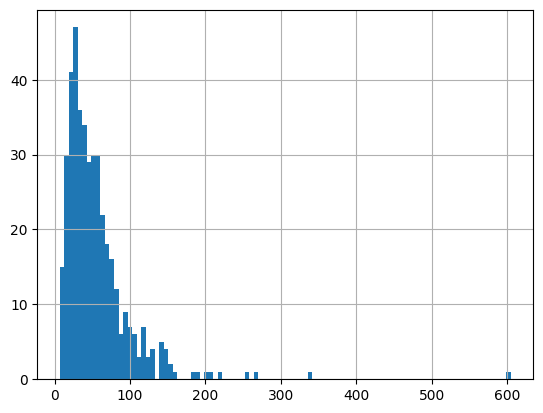

In [1519]:
combined['all_mql_count'].hist(bins=100)

In [1520]:
combined[combined['linkedin_mql_count']>77]


,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,dc360_mql_count,impactDotCom_ga4_sessions,sum_content_download,sum_blog_subscribers,sum_newsletter_signup,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates
26,202419,2024-05-07,19,2024,5610.0,5610.0,1605.0,14443.490000,180581,1197,...,0,5371.0,0.0,0.0,0.0,5,20084.0,0.0327,2024-05-31,0.0012
33,202420,2024-05-14,20,2024,4614.0,4614.0,135.0,13931.030000,184076,1156,...,0,4216.0,0.0,0.0,0.0,5,20084.0,0.0327,2024-05-31,0.0012
64,202424,2024-06-14,24,2024,2784.0,2784.0,397.0,13152.460000,179493,1416,...,0,2545.0,0.0,0.0,0.0,6,18965.0,0.0297,2024-06-30,-0.0691
89,202428,2024-07-09,28,2024,5130.0,5130.0,90.0,13666.539992,181513,1206,...,0,4891.0,0.0,0.0,0.0,7,18593.0,0.0289,2024-07-31,0.0987
118,202432,2024-08-07,32,2024,4333.0,4333.0,79.0,14204.189992,231687,1268,...,0,4015.0,0.0,0.0,0.0,8,18733.0,0.0253,2024-08-31,-0.0089
154,202437,2024-09-12,37,2024,5646.0,5646.0,110.0,11395.129991,162453,938,...,0,5169.0,0.0,0.0,0.0,9,20353.0,0.0244,2024-09-30,-0.0040
187,202442,2024-10-15,42,2024,3180.0,3180.0,95.0,12605.509990,178616,1038,...,0,2942.0,0.0,0.0,0.0,10,18677.0,0.0260,2024-10-31,0.0079
209,202445,2024-11-06,45,2024,4333.0,4333.0,497.0,13301.520000,209995,1800,...,2,3856.0,0.0,0.0,0.0,11,17371.0,0.0275,2024-11-30,-0.0200
224,202447,2024-11-21,47,2024,3975.0,3975.0,400.0,9375.950000,133410,1018,...,10,3736.0,0.0,0.0,0.0,11,17371.0,0.0275,2024-11-30,-0.0200
243,202450,2024-12-10,50,2024,3895.0,3895.0,41.0,9673.250000,136794,923,...,0,3458.0,0.0,0.0,0.0,12,16251.0,0.0289,2024-12-31,-0.0178


In [1521]:
combined['all_less_linkedin_mql'] = combined['all_mql_count'] - combined['linkedin_mql_count']
combined['averageMQL_linkedin'] = (combined['linkedin_mql_count'].shift(1) + combined['linkedin_mql_count'].shift(-1)) / 2
combined['smoothed_MQL_linkedin'] = np.where(combined['linkedin_mql_count']>40,combined['averageMQL_linkedin'] , combined['linkedin_mql_count'])
combined['smoothed_linkedin_MQL_all'] = combined['all_less_linkedin_mql']  +  combined['smoothed_MQL_linkedin'] 

In [1522]:
# Filter for GA3 data
combined['averageMQL'] = (combined['all_mql_count'].shift(1) + combined['all_mql_count'].shift(-1)) / 2
combined['smoothed_MQL'] = np.where(combined['all_mql_count']>130,combined['averageMQL'] , combined['all_mql_count'])

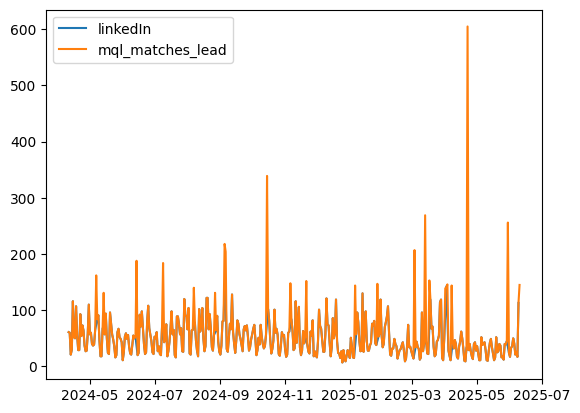

In [1523]:
x = combined['date'].to_numpy()
y1 = combined['smoothed_MQL'].to_numpy()
y2 = combined['all_mql_count'].to_numpy()
plt.plot(x, y1, label='linkedIn')
plt.plot(x, y2, label='mql_matches_lead')
#plt.plot(x, y3, label='all_dates_match')
#plt.plot(x, all, label='cnt_all')
plt.legend()
plt.show()

In [1524]:
# Filter for GA3 data
combined = combined[combined['date']<pd.Timestamp('2025-05-01').date()]
combined['averageMQL'] = (combined['all_mql_count'].shift(1) + combined['all_mql_count'].shift(-1)) / 2
combined['smoothed_MQL'] = np.where(combined['all_mql_count']>130,combined['averageMQL'] , combined['all_mql_count'])

In [1525]:
combined[combined['smoothed_MQL']>150]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,daily_avg_queries,inflation_rate,date_y,durable_goods_rates,all_less_linkedin_mql,averageMQL_linkedin,smoothed_MQL_linkedin,smoothed_linkedin_MQL_all,averageMQL,smoothed_MQL


In [1526]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,daily_avg_queries,inflation_rate,date_y,durable_goods_rates,all_less_linkedin_mql,averageMQL_linkedin,smoothed_MQL_linkedin,smoothed_linkedin_MQL_all,averageMQL,smoothed_MQL
187,202442,2024-10-15,42,2024,3180.0,3180.0,95.0,12605.50999,178616,1038,...,18677.0,0.026,2024-10-31,0.0079,75,21.5,21.5,96.5,79.0,79.0


In [1527]:
combined['daily_avg_queries'] = combined['daily_avg_queries'].fillna(combined['daily_avg_queries'].mean())
combined['durable_goods_rates'] = combined['durable_goods_rates'].fillna(combined['durable_goods_rates'].mean())
combined['inflation_rate'] = combined['inflation_rate'].fillna(combined['inflation_rate'].mean())

In [1528]:
train_small = combined[combined['date']<=pd.Timestamp('2024-10-11').date()]
test_small = combined[(combined['date']>pd.Timestamp('2024-10-11').date()) & (combined['date']<pd.Timestamp('2024-12-11').date())]

In [1529]:
train_small[train_small['durable_goods_rates'].isna()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,refined_ga4_ressions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,...,daily_avg_queries,inflation_rate,date_y,durable_goods_rates,all_less_linkedin_mql,averageMQL_linkedin,smoothed_MQL_linkedin,smoothed_linkedin_MQL_all,averageMQL,smoothed_MQL


In [1530]:
train_small.to_csv('mmm_train_small_phase2.csv')
test_small.to_csv('mmm_test_small_phase2.csv')

In [1531]:
train_small.shape

(184, 44)

In [1532]:
len(['ga4_sessions',
 'podcast_streams',
 'linkedin_spend',
 'linkedin_impressions',
 'linkedin_clicks',
 'gSearch_sessions',
 'gSearch_impressions',
 'gift_spend',
 'email_opened_cnt',
 'direct_spend',
 'fb_spend',
 'fb_impressions',
 'fb_clicks',
 'googleAds_spend',
 'googleAds_impressions',
 'daily_avg_queries'])

16

In [1533]:
train_all = combined[combined['date']<=pd.Timestamp('2025-03-11').date()]
test_all = combined[combined['date']>pd.Timestamp('2025-03-11').date()]

In [1534]:
import pandas as pd

# Assuming your DataFrame has a date column called 'date'
df = train_all.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Find gaps larger than 1 day
df['date_diff'] = df['date'].diff().dt.days
non_sequential = df[df['date_diff'] > 1]
print(non_sequential)


Empty DataFrame
Columns: [model_week, date, iso_week, iso_year, ga4_sessions, refined_ga4_ressions, podcast_streams, linkedin_spend, linkedin_impressions, linkedin_clicks, gSearch_sessions, gSearch_impressions, gift_spend, email_opened_cnt, direct_spend, direct_spend_pharios, direct_spend_dc360, fb_spend, fb_impressions, fb_clicks, googleAds_spend, googleAds_impressions, event_spend, all_mql_count, linkedin_mql_count, sales_sourced_mql_cnt, pharios_mql_cnt, dc360_mql_count, dc360_mql_count, impactDotCom_ga4_sessions, sum_content_download, sum_blog_subscribers, sum_newsletter_signup, month, daily_avg_queries, inflation_rate, date_y, durable_goods_rates, all_less_linkedin_mql, averageMQL_linkedin, smoothed_MQL_linkedin, smoothed_linkedin_MQL_all, averageMQL, smoothed_MQL, date_diff]
Index: []

[0 rows x 45 columns]


In [1535]:
train_all.to_csv('mmm_train_all_phase2.csv')
test_all.to_csv('mmm_test_all_phase2.csv')

In [1552]:
train_all.shape

(335, 44)

In [1555]:
train_all[['date','sum_content_download']]

,date,sum_content_download
0,2024-04-11,0.0
1,2024-04-12,0.0
2,2024-04-13,0.0
3,2024-04-14,0.0
4,2024-04-15,0.0
...,...,...
330,2025-03-07,25.0
331,2025-03-08,9.0
332,2025-03-09,3.0
333,2025-03-10,24.0


In [1557]:
train_all.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'refined_ga4_ressions', 'podcast_streams', 'linkedin_spend',
       'linkedin_impressions', 'linkedin_clicks', 'gSearch_sessions',
       'gSearch_impressions', 'gift_spend', 'email_opened_cnt', 'direct_spend',
       'direct_spend_pharios', 'direct_spend_dc360', 'fb_spend',
       'fb_impressions', 'fb_clicks', 'googleAds_spend',
       'googleAds_impressions', 'event_spend', 'all_mql_count',
       'linkedin_mql_count', 'sales_sourced_mql_cnt', 'pharios_mql_cnt',
       'dc360_mql_count', 'dc360_mql_count', 'impactDotCom_ga4_sessions',
       'sum_content_download', 'sum_blog_subscribers', 'sum_newsletter_signup',
       'month', 'daily_avg_queries', 'inflation_rate', 'date_y',
       'durable_goods_rates', 'all_less_linkedin_mql', 'averageMQL_linkedin',
       'smoothed_MQL_linkedin', 'smoothed_linkedin_MQL_all', 'averageMQL',
       'smoothed_MQL'],
      dtype='object')

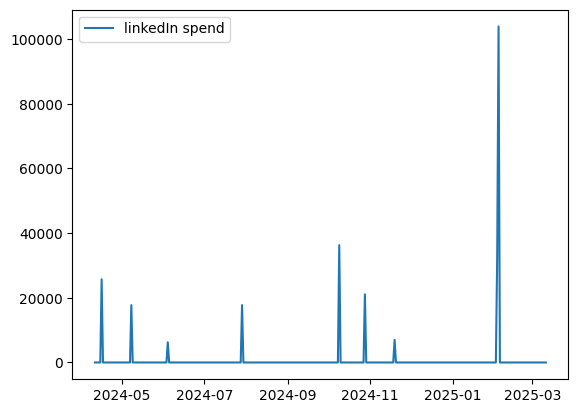

In [1559]:
x = train_all['date']
y1 = train_all['event_spend']

plt.plot(x, y1, label='linkedIn spend')
plt.legend()
plt.show()


#   LinkedIn Data

In [1537]:
data = combined[['linkedin_spend','date']].copy()
data['date'] =  pd.to_datetime(data['date'])

In [1538]:
data['date'].dtype

dtype('<M8[ns]')

In [1539]:
data = pd.concat((data, pd.get_dummies(data['date'].dt.day_name())), axis=1)
data['weekend'] = np.where(data['Saturday']==True, True, False)
data['weekend'] = np.where(data['Sunday']==True, True, data['weekend'])


data['longWeekend'] = np.where(data['Saturday']==True, True, False)
data['longWeekend'] = np.where(data['Sunday']==True, True, data['longWeekend'])
data['longWeekend'] = np.where(data['Friday']==True, True, data['longWeekend'])

In [1540]:
data

,linkedin_spend,date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,longWeekend
0,11063.50,2024-04-11,False,False,False,False,True,False,False,False,False
1,10985.40,2024-04-12,True,False,False,False,False,False,False,False,True
2,8826.29,2024-04-13,False,False,True,False,False,False,False,True,True
3,7257.84,2024-04-14,False,False,False,True,False,False,False,True,True
4,10275.43,2024-04-15,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
380,6231.58,2025-04-26,False,False,True,False,False,False,False,True,True
381,5570.86,2025-04-27,False,False,False,True,False,False,False,True,True
382,6411.23,2025-04-28,False,True,False,False,False,False,False,False,False
383,8470.89,2025-04-29,False,False,False,False,False,True,False,False,False


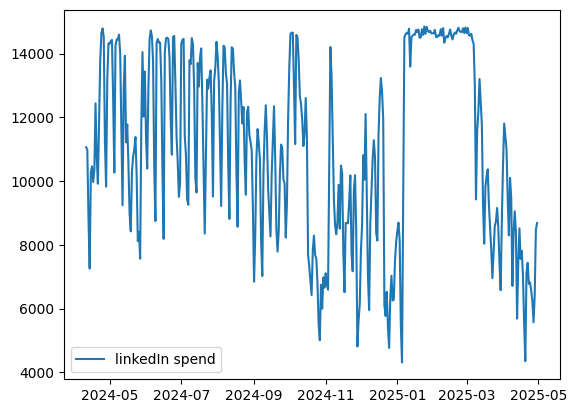

In [1541]:
x = data['date']
y1 = data['linkedin_spend']

plt.plot(x, y1, label='linkedIn spend')
plt.legend()
plt.show()


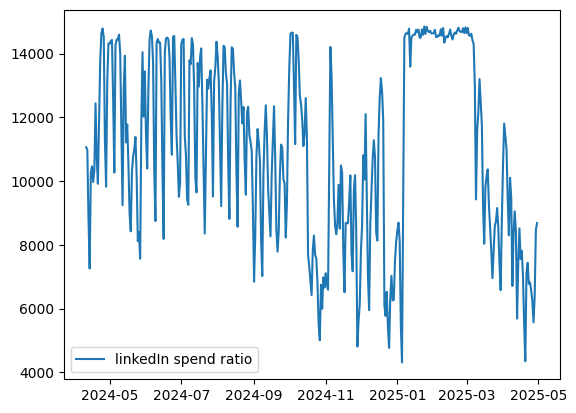

In [1542]:
x = data['date']
y1 = data['linkedin_spend']

plt.plot(x, y1, label='linkedIn spend ratio')
plt.legend()
plt.show()

In [1543]:
data[['date', 'linkedin_spend']].to_csv('linkedin_daily_spend.csv')

In [1544]:
subset2025 = data[data['date']>'2024-12-31']

In [1545]:
subset2025

,linkedin_spend,date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,longWeekend
265,8433.12,2025-01-01,False,False,False,False,False,False,True,False,False
266,8697.03,2025-01-02,False,False,False,False,True,False,False,False,False
267,8139.76,2025-01-03,True,False,False,False,False,False,False,False,True
268,5477.21,2025-01-04,False,False,True,False,False,False,False,True,True
269,4310.15,2025-01-05,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
380,6231.58,2025-04-26,False,False,True,False,False,False,False,True,True
381,5570.86,2025-04-27,False,False,False,True,False,False,False,True,True
382,6411.23,2025-04-28,False,True,False,False,False,False,False,False,False
383,8470.89,2025-04-29,False,False,False,False,False,True,False,False,False


In [1546]:
subset2025[['date']]

,date
265,2025-01-01
266,2025-01-02
267,2025-01-03
268,2025-01-04
269,2025-01-05
...,...
380,2025-04-26
381,2025-04-27
382,2025-04-28
383,2025-04-29


/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_52765/896804599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2025['date'] = subset2025['date'].apply(lambda x: x.strftime('%Y-%m-%d'))


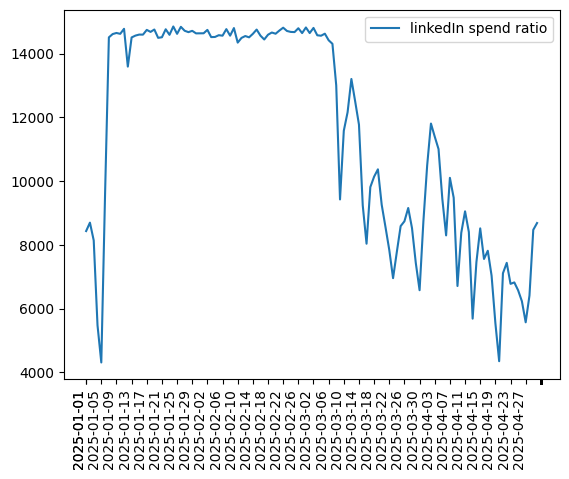

In [1549]:
subset2025['date'] = subset2025['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
x_list = subset2025['date'] .to_list()
labels = []
for i in range(0, len(x_list)):
    if i==0:
        labels.append(x_list[i])
    if i%4==0:
        labels.append(x_list[i])
    else:
        labels.append('')

x = subset2025['date']
y1 = subset2025['linkedin_spend']

plt.plot(x, y1, label='linkedIn spend ratio')
plt.legend()
plt.xticks(labels, rotation=90, ha='right') 
plt.show()

In [1550]:
emails_case.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'refined_ga4_ressions', 'podcast_streams', 'linkedin_spend',
       'linkedin_impressions', 'linkedin_clicks', 'gSearch_sessions',
       'gSearch_impressions', 'gift_spend', 'email_opened_cnt', 'direct_spend',
       'direct_spend_pharios', 'direct_spend_dc360', 'fb_spend',
       'fb_impressions', 'fb_clicks', 'googleAds_spend',
       'googleAds_impressions', 'event_spend', 'all_mql_count',
       'linkedin_mql_count', 'sales_sourced_mql_cnt', 'pharios_mql_cnt',
       'dc360_mql_count', 'dc360_mql_count', 'impactDotCom_ga4_sessions',
       'month', 'daily_avg_queries', 'inflation_rate', 'date_y',
       'durable_goods_rates', 'all_less_linkedin_mql', 'averageMQL_linkedin',
       'smoothed_MQL_linkedin', 'smoothed_linkedin_MQL_all', 'averageMQL',
       'smoothed_MQL'],
      dtype='object')

In [1551]:
emails_case = train_all[train_all['email_opened_cnt']>0]
emails_case[['date', 'email_opened_cnt']]

,date,email_opened_cnt
11,2024-04-22,4936.0
18,2024-04-29,5379.0
25,2024-05-06,207.0
33,2024-05-14,11874.0
39,2024-05-20,5313.0
...,...,...
307,2025-02-12,135.0
315,2025-02-20,190.0
319,2025-02-24,7266.0
328,2025-03-05,172.0


# QC Differences

In [1171]:
old_train_all = pd.read_csv('mmm_train_all.csv')

In [1188]:
old_train_all['date'] = pd.to_datetime(old_train_all['date'])
train_all['date'] = pd.to_datetime(train_all['date'])

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_52765/2114699883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_all['date'] = pd.to_datetime(train_all['date'])


In [1189]:
old_train_all['mql_count']

0       61
1       60
2       21
3       30
4      116
      ... 
330     31
331     12
332     16
333     96
334     27
Name: mql_count, Length: 335, dtype: int64

In [1190]:
train_all['date'].dtype

dtype('<M8[ns]')

In [1191]:
old_train_all['date'].dtype

dtype('<M8[ns]')

In [1192]:
old_train_all['date']

0     2024-04-11
1     2024-04-12
2     2024-04-13
3     2024-04-14
4     2024-04-15
         ...    
330   2025-03-07
331   2025-03-08
332   2025-03-09
333   2025-03-10
334   2025-03-11
Name: date, Length: 335, dtype: datetime64[ns]

In [1193]:
train_all['date']

0     2024-04-11
1     2024-04-12
2     2024-04-13
3     2024-04-14
4     2024-04-15
         ...    
330   2025-03-07
331   2025-03-08
332   2025-03-09
333   2025-03-10
334   2025-03-11
Name: date, Length: 335, dtype: datetime64[ns]

In [1194]:
qc = pd.merge(train_all[['all_mql_count', 'date']], old_train_all[['mql_count', 'date']], on='date')

In [1196]:
qc[qc['mql_count']!=qc['all_mql_count']]

,all_mql_count,date,mql_count
7,107,2024-04-18,108
14,64,2024-04-25,65
27,84,2024-05-08,85
35,94,2024-05-16,95
47,67,2024-05-28,68
62,50,2024-06-12,51
64,188,2024-06-14,191
67,92,2024-06-17,93
89,184,2024-07-09,186
99,65,2024-07-19,66
